In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sim
import math
import time

def get_matriz_rotacaoZ(theta):
    matriz_rotacaoZ = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta),  0],
                                [0            , 0            ,  1]])
    return matriz_rotacaoZ

def plotar_referencial(origem, orientacao):
    eixo_x = np.array(orientacao[0:2, 0])
    eixo_y = np.array(orientacao[0:2, 1])
    
    plt.quiver(*origem[0:2], *eixo_x, color='g', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*origem[0:2], *eixo_y, color='r', angles='xy', scale_units='xy', scale=1)
    

[[ 0.99898302 -0.04508799  0.          3.2724309 ]
 [ 0.04508799  0.99898302  0.         -3.35650969]
 [ 0.          0.          1.         -0.1930896 ]
 [ 0.          0.          0.          1.        ]]
[[ 0.99898291 -0.04509033  0.         -1.86192679]
 [ 0.04509033  0.99898291  0.         -9.932827  ]
 [ 0.          0.          1.         -0.66806108]
 [ 0.          0.          0.          1.        ]]
[[ 0.99898542 -0.04503486  0.          1.79453731]
 [ 0.04503486  0.99898542  0.          1.61160004]
 [ 0.          0.          1.          0.88852149]
 [ 0.          0.          0.          1.        ]]
[[ 0.99898758 -0.04498691  0.          7.24157381]
 [ 0.04498691  0.99898758  0.         -4.02514601]
 [ 0.          0.          1.         -0.81630313]
 [ 0.          0.          0.          1.        ]]
[[ 0.23877052  0.97107602  0.          4.77223778]
 [-0.97107602  0.23877052  0.         -0.29522395]
 [ 0.          0.          1.          0.04655117]
 [ 0.          0.          

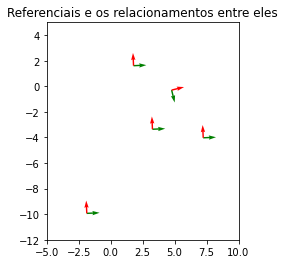

In [3]:
id_cliente = sim.simxStart("127.0.0.1", 19999, True, True, 5000, 5)

NOME_ROBO = "Ant"
OBJS = ["Joao", "casa", "poste", "arvore", "moto"]

if id_cliente != -1:
    rv, handle_robo = sim.simxGetObjectHandle(id_cliente, NOME_ROBO, sim.simx_opmode_oneshot_wait)
    constante = np.array([0, 0, 0, 1])
    trans_homogenea = []
    
    plt.figure()
    
    for obj in OBJS:
        rv, handle_obj = sim.simxGetObjectHandle(id_cliente, obj, sim.simx_opmode_oneshot_wait)
        rv, pos = sim.simxGetObjectPosition(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        rv, orientacao = sim.simxGetObjectOrientation(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        Rz = get_matriz_rotacaoZ(orientacao[0])
        
        plotar_referencial(np.array(pos), Rz)
        
        temp = np.column_stack((Rz, pos))
        trans_homogenea_obj = np.row_stack((temp, constante))
        print(trans_homogenea_obj)
        
        trans_homogenea.append(trans_homogenea_obj)
    
    plt.title("Referenciais e os relacionamentos entre eles")
    plt.axis("scaled")
    plt.axis((-5, 10, -12, 5))
    sim.simxFinish(id_cliente)
    
else:
    print("Não foi possível conectar ao Coppelia Sim!")

[[ 0.99831343 -0.05805423  0.          2.99167442]
 [ 0.05805423  0.99831343  0.         -0.4271704 ]
 [ 0.          0.          1.         -0.08740002]
 [ 0.          0.          0.          1.        ]]
[[ 0.99831474 -0.05803178  0.         -2.15558672]
 [ 0.05803178  0.99831474  0.         -6.98331308]
 [ 0.          0.          1.         -0.69518882]
 [ 0.          0.          0.          1.        ]]
[[ 0.99831331 -0.05805635  0.          1.51934552]
 [ 0.05805635  0.99831331  0.          4.53061438]
 [ 0.          0.          1.          1.01700544]
 [ 0.          0.          0.          1.        ]]
[[ 0.99831464 -0.05803337  0.          6.96228981]
 [ 0.05803337  0.99831464  0.         -1.0991993 ]
 [ 0.          0.          1.         -0.75118613]
 [ 0.          0.          0.          1.        ]]
[[ 0.1836031   0.98300046  0.          4.49523449]
 [-0.98300046  0.1836031   0.          2.63269091]
 [ 0.          0.          1.          0.11792028]
 [ 0.          0.          

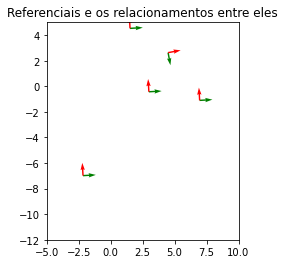

In [4]:
id_cliente = sim.simxStart("127.0.0.1", 19999, True, True, 5000, 5)

NOME_ROBO = "Pioneer_p3dx"
OBJS = ["Joao", "casa", "poste", "arvore", "moto"]

if id_cliente != -1:
    rv, handle_robo = sim.simxGetObjectHandle(id_cliente, NOME_ROBO, sim.simx_opmode_oneshot_wait)
    constante = np.array([0, 0, 0, 1])
    trans_homogenea = []
    
    plt.figure()
    
    for obj in OBJS:
        rv, handle_obj = sim.simxGetObjectHandle(id_cliente, obj, sim.simx_opmode_oneshot_wait)
        rv, pos = sim.simxGetObjectPosition(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        rv, orientacao = sim.simxGetObjectOrientation(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        Rz = get_matriz_rotacaoZ(orientacao[0])
        
        plotar_referencial(np.array(pos), Rz)
        
        temp = np.column_stack((Rz, pos))
        trans_homogenea_obj = np.row_stack((temp, constante))
        print(trans_homogenea_obj)
        
        trans_homogenea.append(trans_homogenea_obj)
    
    plt.title("Referenciais e os relacionamentos entre eles")
    plt.axis("scaled")
    plt.axis((-5, 10, -12, 5))
    sim.simxFinish(id_cliente)
    
else:
    print("Não foi possível conectar ao Coppelia Sim!")

In [2]:
def readSensorData(clientId=-1, 
                    range_data_signal_id="hokuyo_range_data", 
                    angle_data_signal_id="hokuyo_angle_data"):

    returnCodeRanges, string_range_data = sim.simxGetStringSignal(clientId, range_data_signal_id, sim.simx_opmode_streaming)

    returnCodeAngles, string_angle_data = sim.simxGetStringSignal(clientId, angle_data_signal_id, sim.simx_opmode_blocking)

    if returnCodeRanges == 0 and returnCodeAngles == 0:
        raw_range_data = sim.simxUnpackFloats(string_range_data)
        raw_angle_data = sim.simxUnpackFloats(string_angle_data)

        return raw_range_data, raw_angle_data

    return None


def draw_laser_data(laser_data, max_sensor_range=5):
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(x, y, 'o', color=c)

    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

def get_laser_array(laser_array, laser_data, pos, max_sensor_range=5):
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        if (max_sensor_range - dist) > 0.1:
            x = (dist * np.cos(ang)) + pos[0]
            y = (dist * np.sin(ang)) + pos[1]
            if (x,y) not in laser_array:
                laser_array.append((x,y))
    return laser_array

Connected to remote API server
Program ended


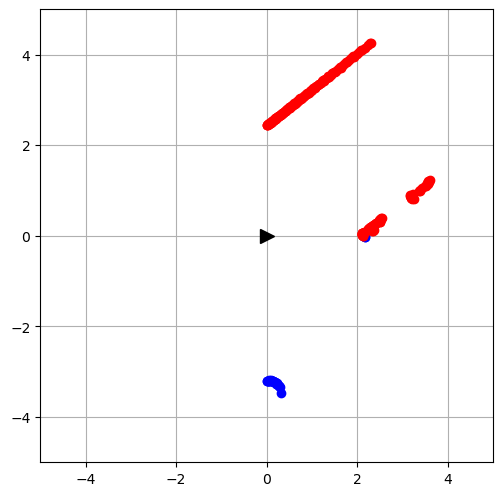

In [11]:
sim.simxFinish(-1)
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    # Iniciando a simulação
    # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
    # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)     
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)    
    
    # Handle para os dados do LASER
    laser_range_data = "hokuyo_range_data"
    laser_angle_data = "hokuyo_angle_data"
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_range_data, sim.simx_opmode_streaming + 10)
    
    # Prosseguindo com as leituras
    raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T
    
    returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    pos_inicial = pos
    #print('Pos: ', pos)
    
    #print(laser_data)
    draw_laser_data(laser_data)
    
    sensor_array = []
    sensor_array = get_laser_array(sensor_array, laser_data, pos)
    #print(sensor_array)
    
    position_xarray = [pos[0]]
    position_yarray = [pos[1]]
    #raise SystemExit()
    
    # Dados do Pioneer
    L = 0.381   # Metros
    r = 0.0975  # Metros

    t = 0
    # Lembrar de habilitar o 'Real-time mode'
    startTime=time.time()
    lastTime = startTime
    while t < 60:
        
        now = time.time()
        dt = now - lastTime
    
        # Fazendo leitura do laser   
        raw_range_data, raw_angle_data = readSensorData(clientID, laser_range_data, laser_angle_data)
        laser_data = np.array([raw_angle_data, raw_range_data]).T
        returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
        sensor_array = get_laser_array(sensor_array, laser_data, pos)
        position_xarray.append(pos[0])
        position_yarray.append(pos[1])
        
        # Velocidade básica (linear, angular)
        v = 0
        w = np.deg2rad(0)      

        frente = int(len(laser_data)/2)
        lado_direito = int(len(laser_data)*1/4)
        lado_esquerdo = int(len(laser_data)*3/4)
        
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
        elif laser_data[lado_direito, 1] > 2:
            v = 0
            w = np.deg2rad(-30)
        elif laser_data[lado_esquerdo, 1] > 2:
            v = 0
            w = np.deg2rad(30)
        
        # Isso é o modelo cinemático, estudaremos detalhadamente depois!
        wl = v/r - (w*L)/(2*r)
        wr = v/r + (w*L)/(2*r)
        
        # Enviando velocidades
        sim.simxSetJointTargetVelocity(clientID, l_wheel, wl, sim.simx_opmode_streaming + 5)
        sim.simxSetJointTargetVelocity(clientID, r_wheel, wr, sim.simx_opmode_streaming + 5)        
    
        t = t + dt  
        lastTime = now

    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
       
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

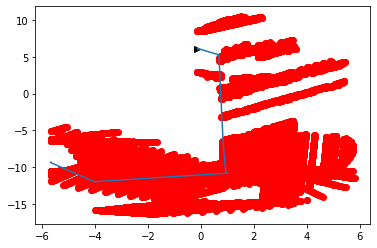

In [13]:
plt.plot(pos_inicial[0], pos_inicial[1], 'k>', color='black')

for i in range(len(sensor_array)):
    plt.plot(sensor_array[i][0], sensor_array[i][1], 'o', color='r')
plt.plot(position_xarray, position_yarray)